In [122]:
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
import seaborn as sns

figures_dir = Path("../reports/figures")
data_dir = Path("../data")

dataset_path = data_dir / "raw/filtered.tsv"
formatted_dataset_path = data_dir / "interim/formatted.parquet"

In [123]:
df = pd.read_csv(dataset_path, sep="\t")
df

,Unnamed: 0,reference,translation,similarity,lenght_diff,ref_tox,trn_tox
0,0,"If Alkar is flooding her with psychic waste, t...","if Alkar floods her with her mental waste, it ...",0.785171,0.010309,0.014195,0.981983
1,1,Now you're getting nasty.,you're becoming disgusting.,0.749687,0.071429,0.065473,0.999039
2,2,"Well, we could spare your life, for one.","well, we can spare your life.",0.919051,0.268293,0.213313,0.985068
3,3,"Ah! Monkey, you've got to snap out of it.","monkey, you have to wake up.",0.664333,0.309524,0.053362,0.994215
4,4,I've got orders to put her down.,I have orders to kill her.,0.726639,0.181818,0.009402,0.999348
...,...,...,...,...,...,...,...
577772,577772,You didn't know that Estelle had stolen some f...,you didn't know that Estelle stole your fish f...,0.870322,0.030769,0.000121,0.949143
577773,577773,It'il suck the life out of you!,you'd be sucked out of your life!,0.722897,0.058824,0.996124,0.215794
577774,577774,"I can't fuckin' take that, bruv.",I really can't take this.,0.617511,0.212121,0.984538,0.000049
577775,577775,They called me a fucking hero. The truth is I ...,"they said I was a hero, but I didn't care.",0.679613,0.358209,0.991945,0.000124


In [124]:
df[["similarity", "lenght_diff", "ref_tox", "trn_tox"]].describe()

,similarity,lenght_diff,ref_tox,trn_tox
count,577777.000000,577777.000000,577777.000000,577777.000000
mean,0.758469,0.157652,0.541372,0.434490
std,0.092695,0.108057,0.457571,0.458904
min,0.600001,0.000000,0.000033,0.000033
25%,0.681105,0.066667,0.012171,0.000707
50%,0.754439,0.141791,0.806795,0.085133
75%,0.831244,0.238095,0.990469,0.973739
max,0.950000,0.400000,0.999724,0.999730


`ref_tox` and `trn_tox` have approximately the same quartiles except for median. That suggests both `reference` and `translation` contain toxic sentences only thing is `translation` mostly contains detoxified ones.

In [125]:
cols = ["score", "label"]
ref_tox = pd.concat([df["ref_tox"], pd.Series("ref_tox", index=df["ref_tox"].index)], axis=1)
trn_tox = pd.concat([df["trn_tox"], pd.Series("trn_tox", index=df["trn_tox"].index)], axis=1)
ref_tox.columns, trn_tox.columns = cols, cols

tox_df = pd.concat([ref_tox, trn_tox])

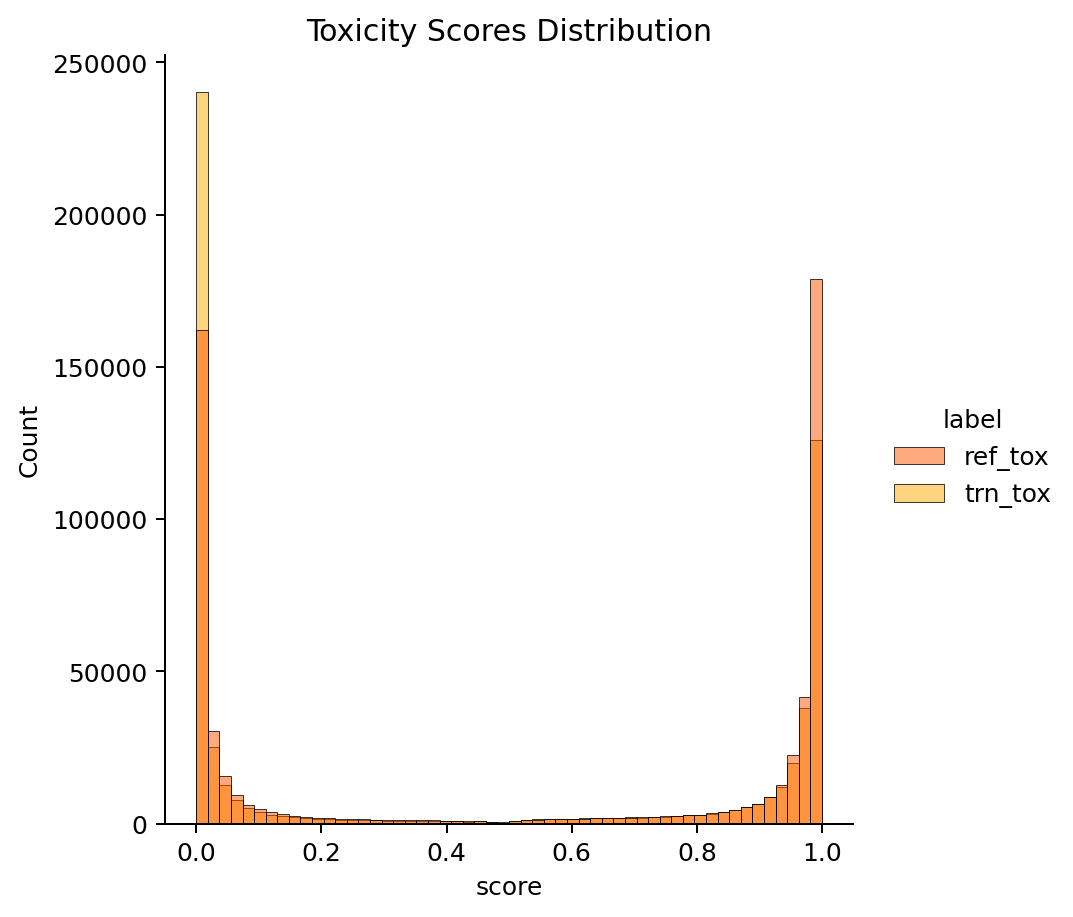

In [126]:
plt.rcParams['figure.dpi'] = 180
plt.rcParams['savefig.dpi'] = 180
plot = sns.displot(data=tox_df, x="score", hue="label", palette="autumn", alpha=0.5, linewidth=0.3)
title = "Toxicity Scores Distribution"
plt.title(title)

plot.savefig(figures_dir / (title + ".png"))

I suggest converting the `ref-trn` relation into `toxic-neutral` by swapping `ref` and `trn` if `ref_tox < ref_trn`

In [127]:
df_proba = df.sample(5)
df_proba

,Unnamed: 0,reference,translation,similarity,lenght_diff,ref_tox,trn_tox
198288,198288,I heard she's a monster.,I heard he was a monster.,0.888895,0.038462,0.986736,0.183678
361313,361313,I don'tneed this shit right now.,I don't need this right now.,0.606418,0.121212,0.998908,0.000042
338196,338196,"Traveling by ship, you damn well better live o...","by boat travel, it's a hell of a lot better to...",0.758194,0.029851,0.975686,0.007650
67517,67517,Now you're going to take on a professional kil...,so you're gonna kill a professional killer?,0.806098,0.137255,0.031951,0.994827
159050,159050,"The police went on about a white Ford Transit,...","the police went along a white Ford Transit, gy...",0.922062,0.044776,0.031348,0.948502


In [128]:
trn_tox_cond = df["trn_tox"] > df["ref_tox"]
df.loc[trn_tox_cond, ["reference", "translation", "ref_tox", "trn_tox"]] = df.loc[trn_tox_cond, ["translation", "reference", "trn_tox", "ref_tox"]].values
df.iloc[df_proba.index]

,Unnamed: 0,reference,translation,similarity,lenght_diff,ref_tox,trn_tox
198288,198288,I heard she's a monster.,I heard he was a monster.,0.888895,0.038462,0.986736,0.183678
361313,361313,I don'tneed this shit right now.,I don't need this right now.,0.606418,0.121212,0.998908,0.000042
338196,338196,"Traveling by ship, you damn well better live o...","by boat travel, it's a hell of a lot better to...",0.758194,0.029851,0.975686,0.007650
67517,67517,so you're gonna kill a professional killer?,Now you're going to take on a professional kil...,0.806098,0.137255,0.994827,0.031951
159050,159050,"the police went along a white Ford Transit, gy...","The police went on about a white Ford Transit,...",0.922062,0.044776,0.948502,0.031348


Let's check the distribution now.

In [129]:
df[["ref_tox", "trn_tox"]].describe()

,ref_tox,trn_tox
count,577777.000000,577777.000000
mean,0.940260,0.035601
std,0.100831,0.079399
min,0.500139,0.000033
25%,0.940145,0.000164
50%,0.983842,0.003456
75%,0.997519,0.027242
max,0.999730,0.499494


Now reference and neurtal texts look polarized, but their worst scenarios almost intersect - means dataset needs at least some noise reduction. Let's look at 10% quantiles on both of them

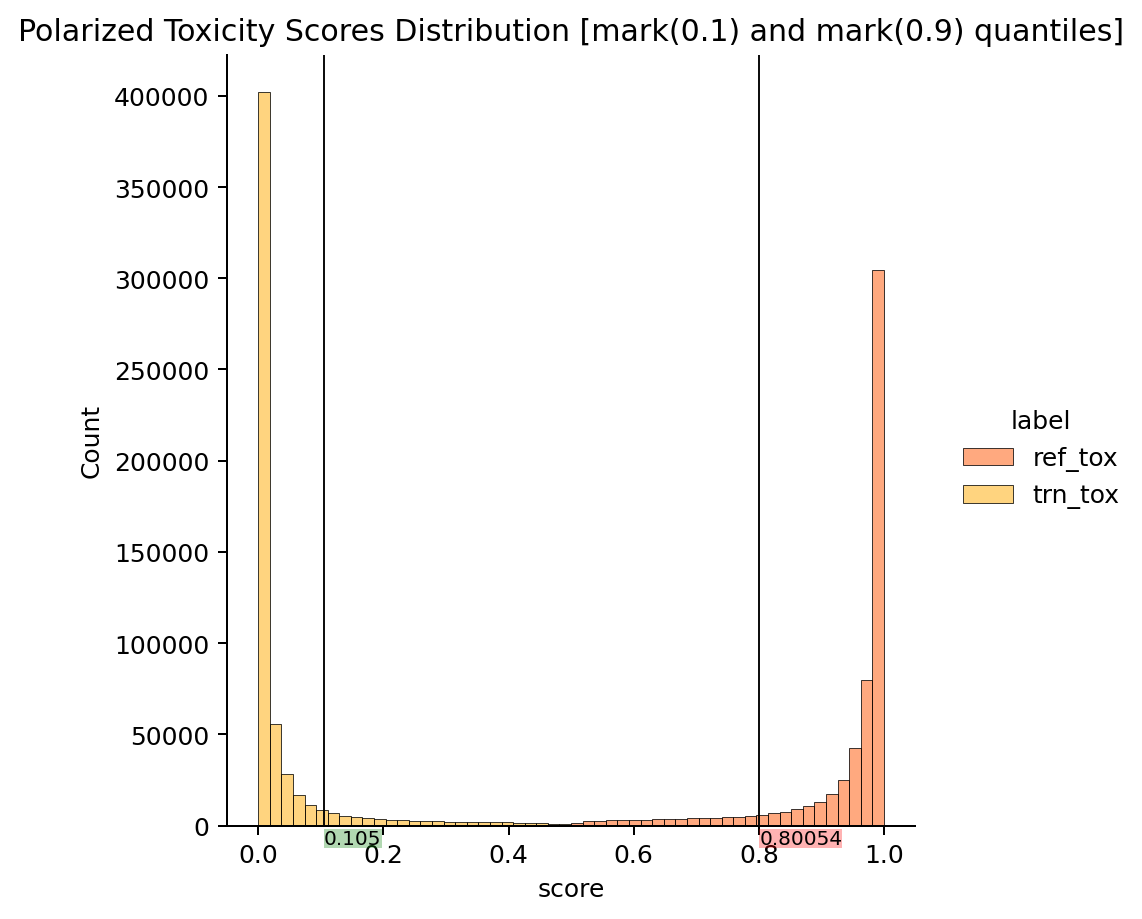

In [130]:
cols = ["score", "label"]
ref_tox = pd.concat([df["ref_tox"], pd.Series("ref_tox", index=df["ref_tox"].index)], axis=1)
trn_tox = pd.concat([df["trn_tox"], pd.Series("trn_tox", index=df["trn_tox"].index)], axis=1)
ref_tox.columns, trn_tox.columns = cols, cols

tox_df = pd.concat([ref_tox, trn_tox])

plt.rcParams['figure.dpi'] = 180
plt.rcParams['savefig.dpi'] = 180
plot = sns.displot(data=tox_df, x="score", hue="label", palette="autumn", alpha=0.5, linewidth=0.3)

bbox = dict(facecolor='green', alpha=0.3, pad=0.05, edgecolor='none')
trn_tox_p = df["trn_tox"].quantile(0.9)
plt.axvline(trn_tox_p, 0, 1, color="black", linewidth=0.75)
plt.text(trn_tox_p, -1e4, trn_tox_p.round(5), fontsize=8, bbox=bbox)

bbox = dict(facecolor='red', alpha=0.3, pad=0.05, edgecolor='none')
ref_tox_p = df["ref_tox"].quantile(0.1)
plt.axvline(ref_tox_p, 0, 1, color="black", linewidth=0.75)
plt.text(ref_tox_p, -1e4, ref_tox_p.round(5), fontsize=8, bbox=bbox)
title = "Polarized Toxicity Scores Distribution [mark(0.1) and mark(0.9) quantiles]"
plt.title(title)

plot.savefig(figures_dir / (title + ".png"))

Borders seem reasonable, but i'd like to shift the one for toxic texts a bit higher. Before that, let's cut the neutral samples as it shall affect adjacent toxic ones.

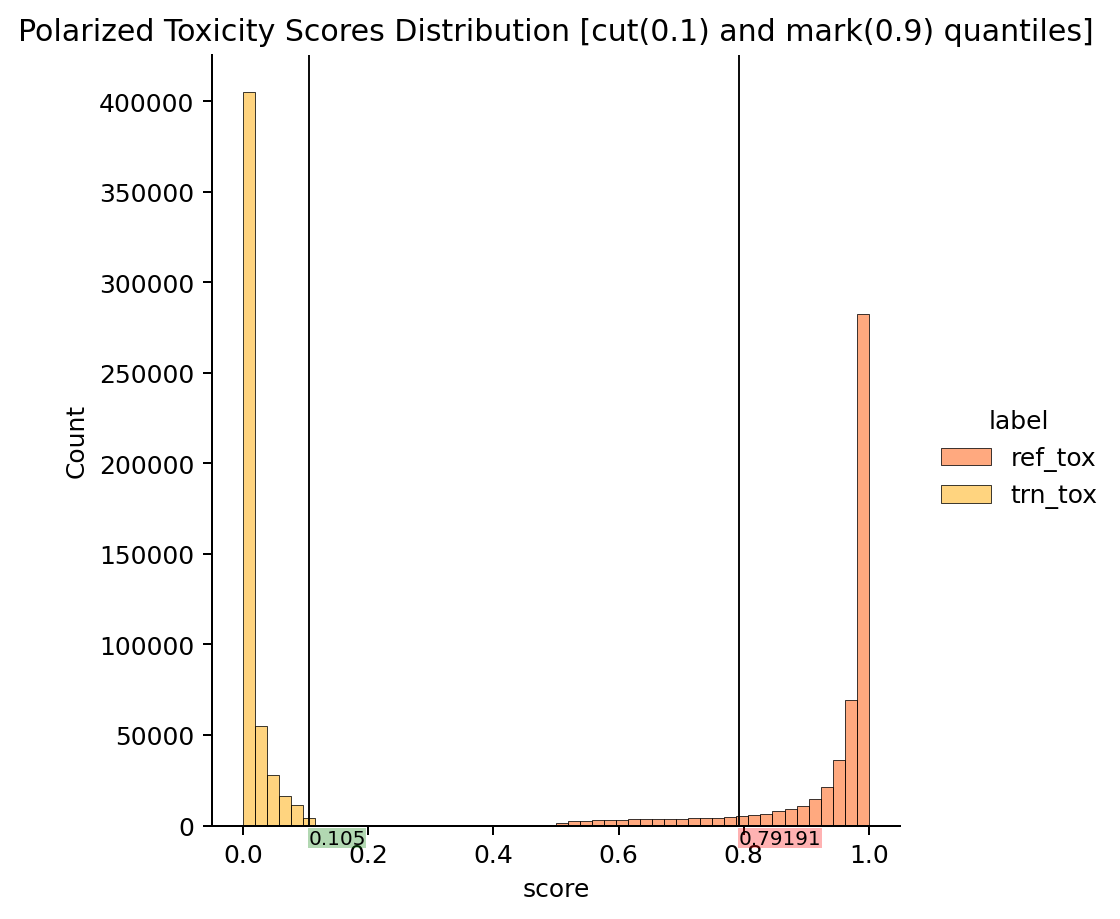

In [131]:
df = df[df["trn_tox"] < trn_tox_p]

cols = ["score", "label"]
ref_tox = pd.concat([df["ref_tox"], pd.Series("ref_tox", index=df["ref_tox"].index)], axis=1)
trn_tox = pd.concat([df["trn_tox"], pd.Series("trn_tox", index=df["trn_tox"].index)], axis=1)
ref_tox.columns, trn_tox.columns = cols, cols

tox_df = pd.concat([ref_tox, trn_tox])

plt.rcParams['figure.dpi'] = 180
plt.rcParams['savefig.dpi'] = 180
plot = sns.displot(data=tox_df, x="score", hue="label", palette="autumn", alpha=0.5, linewidth=0.3)

bbox = dict(facecolor='green', alpha=0.3, pad=0.05, edgecolor='none')
# As we have already adjusted this border, let's leave it's value as is 
plt.axvline(trn_tox_p, 0, 1, color="black", linewidth=0.75)
plt.text(trn_tox_p, -1e4, trn_tox_p.round(5), fontsize=8, bbox=bbox)

bbox = dict(facecolor='red', alpha=0.3, pad=0.05, edgecolor='none')
ref_tox_p = df["ref_tox"].quantile(0.1)
plt.axvline(ref_tox_p, 0, 1, color="black", linewidth=0.75)
plt.text(ref_tox_p, -1e4, ref_tox_p.round(5), fontsize=8, bbox=bbox)
title = "Polarized Toxicity Scores Distribution [cut(0.1) and mark(0.9) quantiles]"
plt.title(title)

plot.savefig(figures_dir / (title + ".png"))

Unfortunately here we see a shift in the toxic text scores distribution. Likely that happened as I have cut such samples that were so obscene that it was hard to refrase in a neutral way. To address the probem I suggest cutting off samples by toxic scores too and looking on how it changes the picture. For a p-value I'd take 0.1 percentile, since it didn't really change too much with recent adjustments.

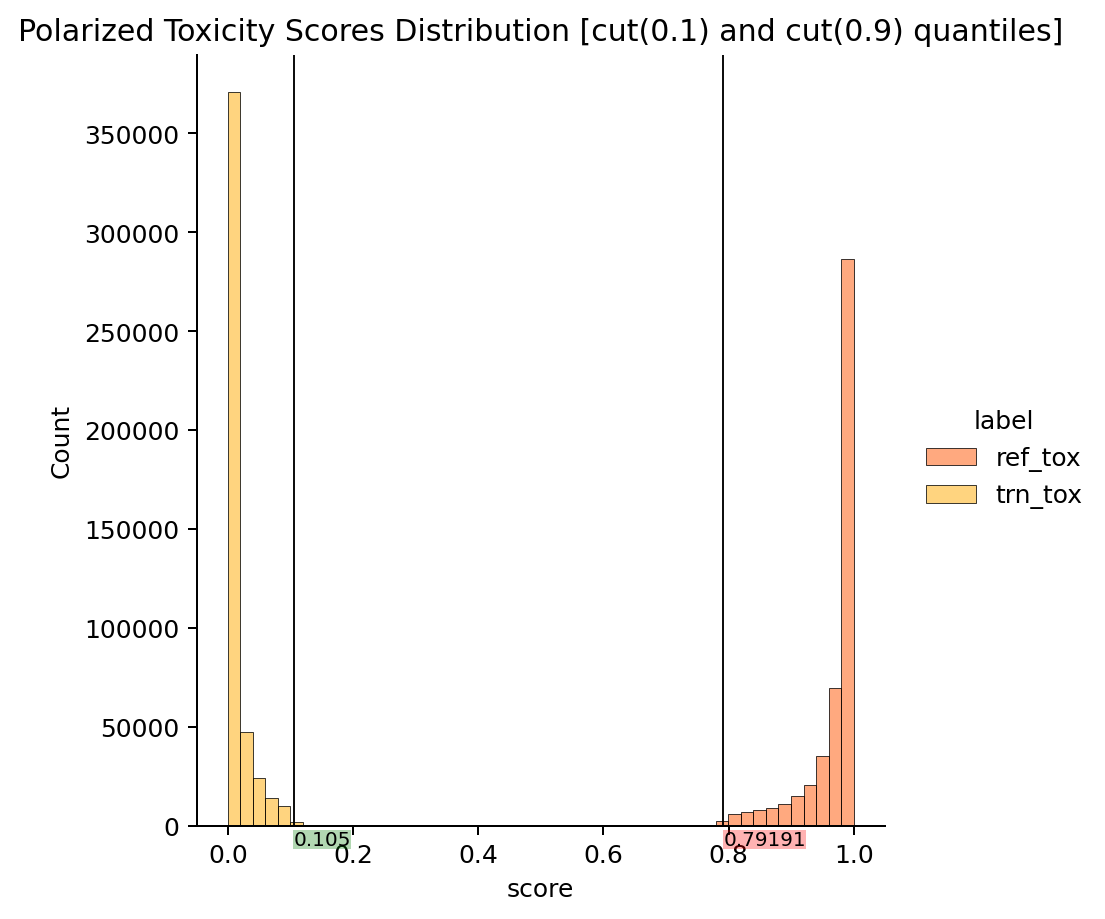

In [132]:
df = df[df["ref_tox"] > ref_tox_p]

cols = ["score", "label"]
ref_tox = pd.concat([df["ref_tox"], pd.Series("ref_tox", index=df["ref_tox"].index)], axis=1)
trn_tox = pd.concat([df["trn_tox"], pd.Series("trn_tox", index=df["trn_tox"].index)], axis=1)
ref_tox.columns, trn_tox.columns = cols, cols

tox_df = pd.concat([ref_tox, trn_tox])

plt.rcParams['figure.dpi'] = 180
plt.rcParams['savefig.dpi'] = 180
plot = sns.displot(data=tox_df, x="score", hue="label", palette="autumn", alpha=0.5, linewidth=0.3)

bbox = dict(facecolor='green', alpha=0.3, pad=0.05, edgecolor='none')
# As we have already adjusted this border, let's leave it's value as is 
plt.axvline(trn_tox_p, 0, 1, color="black", linewidth=0.75)
plt.text(trn_tox_p, -1e4, trn_tox_p.round(5), fontsize=8, bbox=bbox)

bbox = dict(facecolor='red', alpha=0.3, pad=0.05, edgecolor='none')
# As we have already adjusted this border, let's leave it's value as is 
plt.axvline(ref_tox_p, 0, 1, color="black", linewidth=0.75)
plt.text(ref_tox_p, -1e4, ref_tox_p.round(5), fontsize=8, bbox=bbox)
title = "Polarized Toxicity Scores Distribution [cut(0.1) and cut(0.9) quantiles]"
plt.title(title)

plot.savefig(figures_dir / (title + ".png"))

In [133]:
df.shape

(467999, 7)

I cut off about 19% of the dataset. I'd assume the samples left as most fitting as they are strictly polarized and with that they map onto each other making the difference in scores pretty high -> hopefully they are good examples of successful paraphrasing.

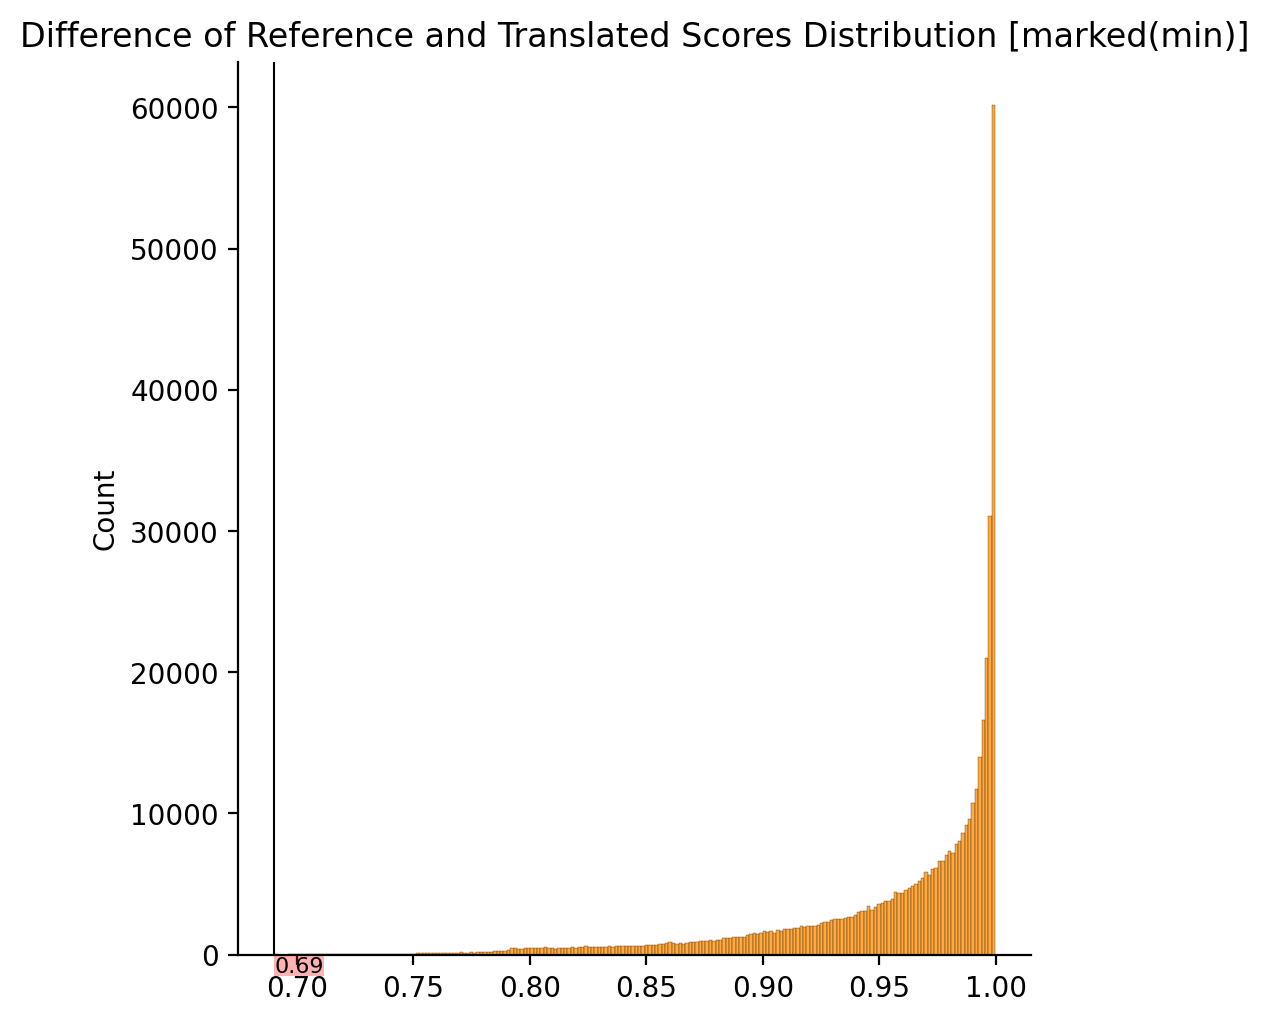

In [134]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200
plot = sns.displot(df["ref_tox"] - df["trn_tox"], linewidth=0.1, color="darkorange")

min_diff = (df["ref_tox"] - df["trn_tox"]).min()
plt.axvline(min_diff, 0, 1, color="black", linewidth=0.75)
plt.text(min_diff, -1.25e3, min_diff.round(2), fontsize=8, bbox=bbox)
title = "Difference of Reference and Translated Scores Distribution [marked(min)]"
plt.title(title)

plot.savefig(figures_dir / (title + ".png"))

The difference in scores looks Nice, I think it's pronounced enough

Let's now think of similarity and toxicity scores dependancy. The assumtion is that sometimes high toxicity reduction might be due to poor meaning persistance and thus could be destructive.

In [135]:
df["tox_diff"] = df["ref_tox"]-df["trn_tox"]
df["fit_score"] = df["tox_diff"] * df["similarity"]
df = df.sort_values(by="fit_score", ascending=False).reset_index(drop=True)

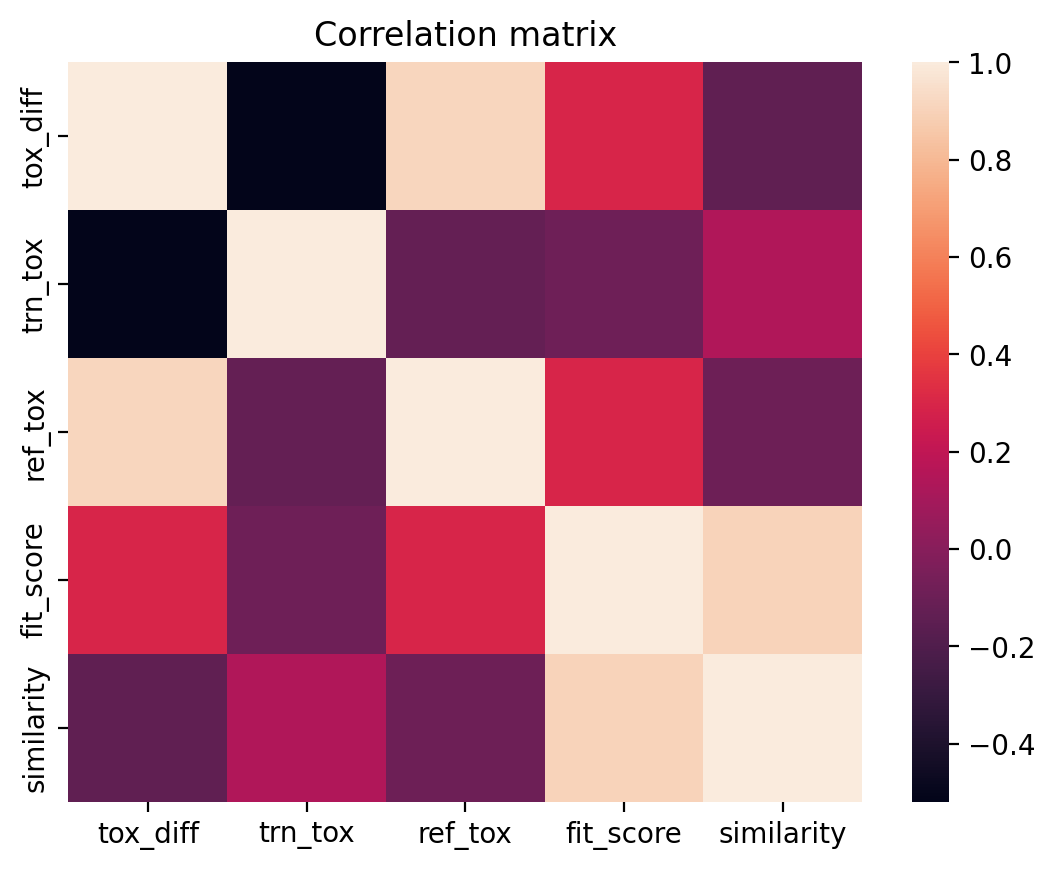

In [136]:
plot = sns.heatmap(df[["tox_diff", "trn_tox", "ref_tox", "fit_score", "similarity"]].corr())
title = "Correlation matrix"
plt.title(title)

plot.figure.savefig(figures_dir / (title + ".png"))

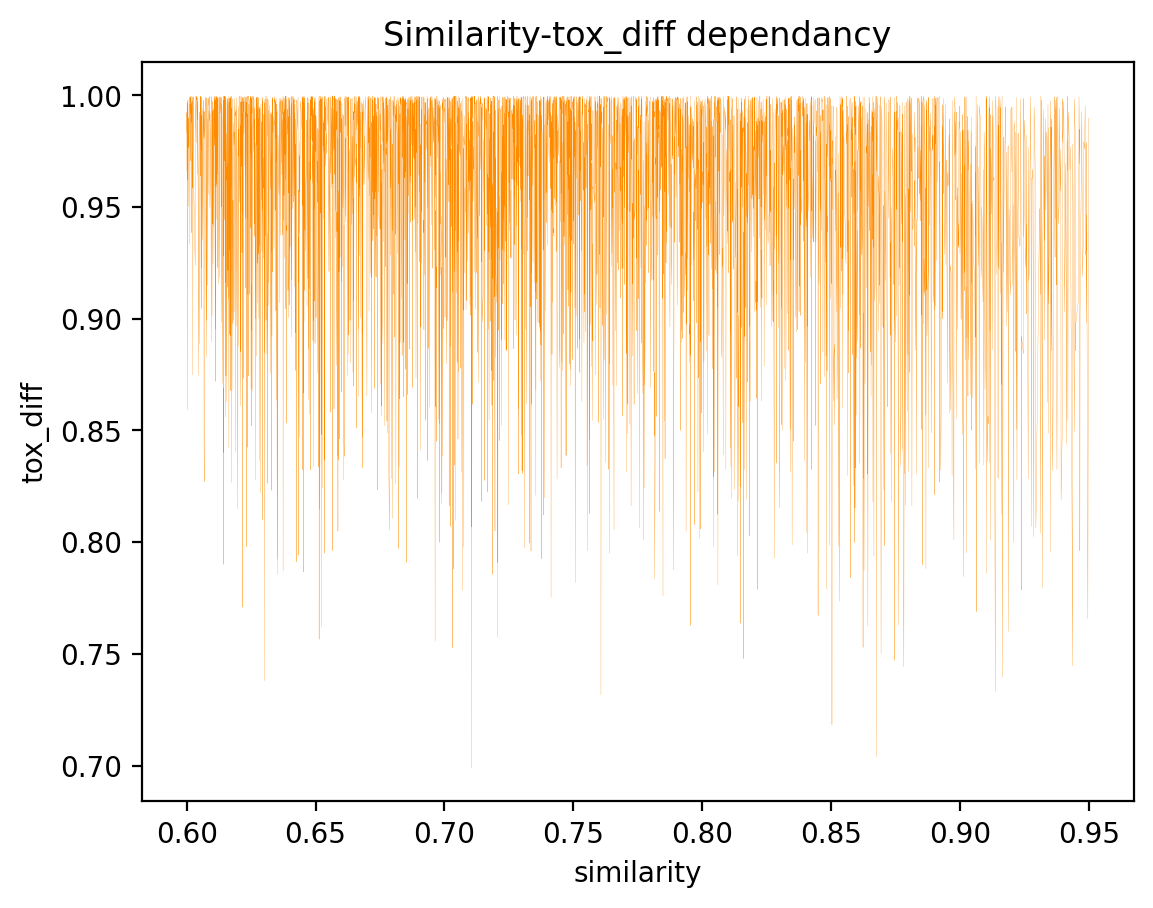

In [137]:
plot = sns.lineplot(data=df.sample(frac=0.01), x="similarity", y="tox_diff", linewidth=0.1, color="darkorange")
title = "Similarity-tox_diff dependancy"
plt.title(title)

plot.figure.savefig(figures_dir / (title + ".png"))

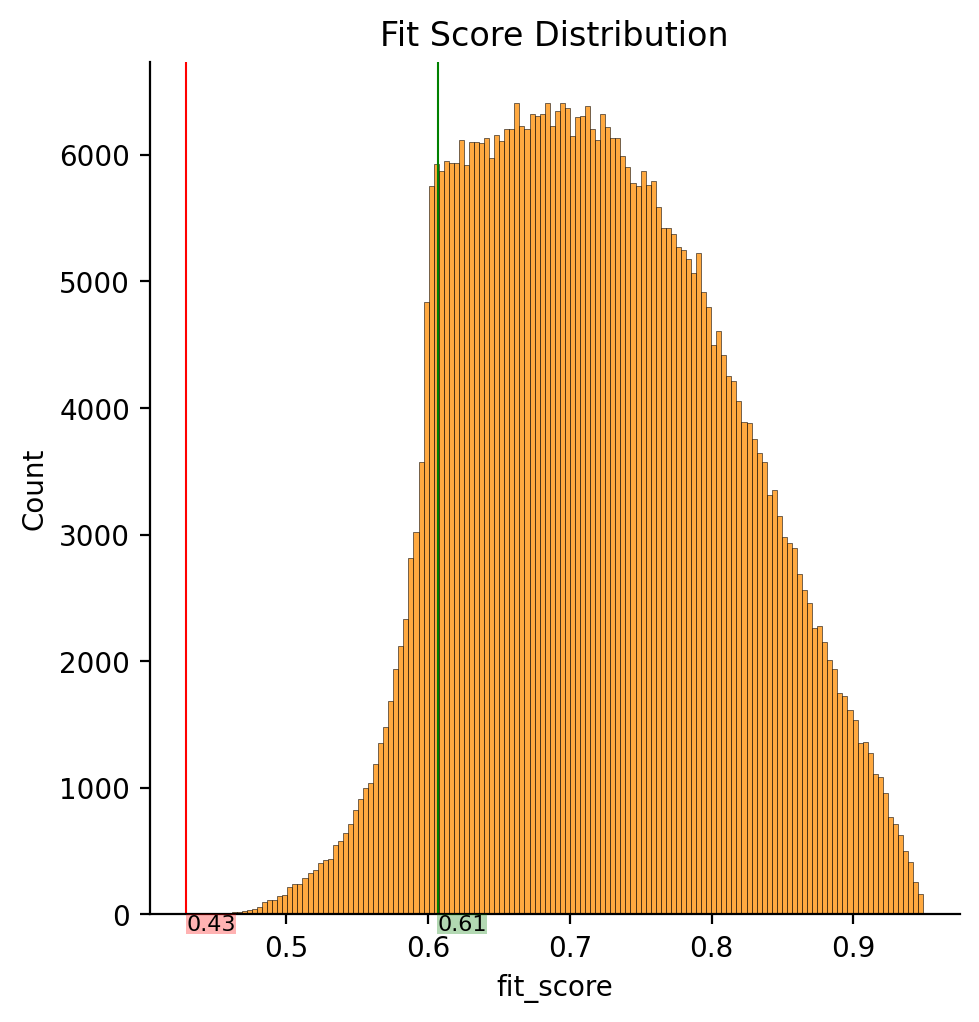

In [138]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200

plot = sns.displot(df["fit_score"], color="darkorange")
quantile = df["fit_score"].quantile(0.1)
min_score = df["fit_score"].min()

bbox = dict(facecolor='green', alpha=0.3, pad=0.05, edgecolor='none')
plt.axvline(quantile, 0, 1, color="green", linewidth=0.75)
plt.text(quantile, -1.25e2, quantile.round(2), fontsize=8, bbox=bbox)

bbox = dict(facecolor='red', alpha=0.3, pad=0.05, edgecolor='none')
plt.axvline(min_score, 0, 1, color="red", linewidth=0.75)
plt.text(min_score, -1.25e2, min_score.round(2), fontsize=8, bbox=bbox)

title = "Fit Score Distribution"
plt.title(title)

plot.figure.savefig(figures_dir / (title + ".png"))

Although we don't wee correlation between the two metrics, in attempt to combine them we get a small tail on the left handside (10% of samples). Cutting it seems a good precaution to ensure excluding well-detoxified sentences that nonetheless fail to attend to original structure.

In [139]:
df = df[df["fit_score"] > quantile].reset_index(drop=True)

In [140]:
df.describe()

,Unnamed: 0,similarity,lenght_diff,ref_tox,trn_tox,tox_diff,fit_score
count,421199.000000,421199.000000,421199.000000,421199.000000,421199.000000,421199.000000,421199.000000
mean,289034.868601,0.765716,0.159379,0.974183,0.011615,0.962568,0.735891
std,166858.535896,0.086511,0.108721,0.038358,0.020142,0.045668,0.081232
min,0.000000,0.606997,0.000000,0.791922,0.000033,0.691575,0.606735
25%,144424.500000,0.695105,0.066667,0.967395,0.000113,0.946804,0.668394
50%,288843.000000,0.761531,0.142857,0.990787,0.001569,0.980263,0.727965
75%,433743.500000,0.832172,0.241379,0.998327,0.013911,0.995623,0.795023
max,577776.000000,0.950000,0.400000,0.999730,0.104988,0.999681,0.949216


In [141]:
df.reset_index(drop=True).to_parquet(formatted_dataset_path, index=None)